<a href="https://colab.research.google.com/github/Humam-PS/Deep-Learning/blob/main/tensorflow_digit_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Our Own Python Modules or Files into Colab

## 1) Mount your google drive in google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2) We'll need to update our path to import from Drive.

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/')

## 3) Now, we can be able to import our modules or files stuff from drive

In [ ]:
### To import using the following code lines, *.py files should be in drive ###
# from myplts import plt_bar, plt_img

In [ ]:
### You can import *.ipynb files directly ### - Here, install library

# Method_01
!pip install kora -q
from kora import drive
drive.link_nbs()

from myplts import plt_bar, plt_img

# Method_02
#!cp -r "/content/drive/MyDrive/Colab Notebooks/myplts.ipynb" '/content/'

<function myplts.plt_bar>

# Main Code

In [ ]:
# ************************************************************************************************
# ******************    IMPORT MODULES    ********************************************************
# ************************************************************************************************

In [ ]:
# import tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

In [ ]:
# import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# print version of tensorflow framework
print(tf.__version__)

2.4.1


In [ ]:
# ************************************************************************************************
# ******************    LOADING DATA SETS (TRAINING SET & TEST SET)    ***************************
# ************************************************************************************************

In [ ]:
# import the  MNIST dataset
digit_mnist = keras.datasets.mnist

# Loading the MNIST dataset in Keras
(train_images, train_labels), (test_images, test_labels) = digit_mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Let’s look at the training data (images)
train_images.shape    # images are encoded as Numpy arrays of shape (60000, 28, 28) of type uint8 [0-255]

(60000, 28, 28)

In [ ]:
# Let’s look at the training data (labels = expected output)
print(len(train_labels))   # train_labels: array of digits, ranging from 0 to 9.
train_labels               # The images and labels have a one-to-one correspondence.

60000


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# Let’s look at the test data (images)
test_images.shape    # images are encoded as Numpy arrays of shape (10000, 28, 28) of type uint8 [0-255]

(10000, 28, 28)

In [ ]:
# Let’s look at the test data (labels = expected output)
print(len(test_labels))   # test_labels: array of digits, ranging from 0 to 9.
test_labels               # The images and labels have a one-to-one correspondence.

10000


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
# ************************************************************************************************
# ******************    VISUALIZE DATA SET (TRAINING SET)    *************************************
# ************************************************************************************************

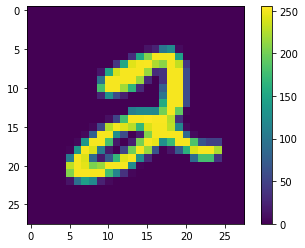

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
# Lets visualize one sample from train_images:

sample = 5                        # sample index

plt.figure()
plt.imshow(train_images[sample])
plt.colorbar()                    # pixel intensity [0-255]
plt.show()

# Also we can see its matrix value
train_images[sample]              # each pixel of type uint8 with pixel intensity [0-255]

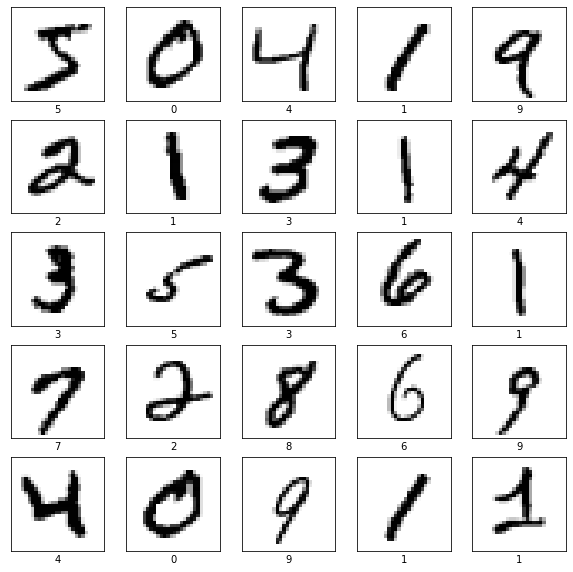

In [ ]:
# Lets visualize the first 25 samples from train_images:

digits = range(10) # create sorted list [0-9].

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(digits[train_labels[i]])
plt.show()

In [ ]:
# ************************************************************************************************
# ******************    PREPROCESS THE DATASETs    ***********************************************
# ************    into the shape the network expects    ******************************************
# ************************************************************************************************

In [ ]:
#1 PREPARING THE IMAGE DATA *********

# reshape data set into the shape the network expects:
train_images = train_images.reshape((60000, 28*28))
test_images  = test_images.reshape((10000, 28*28))

# transform data set into a float32 and scale each value to be in the [0, 1] interval
train_images = train_images.astype('float32') /255
test_images  = test_images.astype('float32') / 255

In [ ]:
print(train_images.shape)
train_images

(60000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#2 PREPARING THE LABELS ********* we need to categorically encode the labels

to_categorical = keras.utils.to_categorical

train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)


In [ ]:
# ************************************************************************************************
# ******************    NETWORK ARCHITECTURE (SET UP THE LAYERS)    ******************************
# ************************************************************************************************

In [ ]:
# define neural_network (define the keras model), it's not optimal, It has to be optimized

# Hidden Layer - Dense fully connected layer of 512 nodes (relu)
# Output Layer - Dense fully connected layer of 10 nodes (softmax)
#                returns an array of 10 probability scores (summing to 1)

In [ ]:
'''
model = keras.Sequential()
model.add(keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(keras.layers.Dense(10,  activation='softmax'))
'''

model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(28*28,)),
    keras.layers.Dense(10,  activation='softmax')
])


In [ ]:
# ************************************************************************************************
# ******************    COMPILE AND OPTIMIZE THE MODEL    ****************************************
# ************************************************************************************************

In [ ]:
# we need to pick three more things, as part of the compilation step:
    # 1- loss function - Measures the quality of the Network's output on the training data.
    # 2- Optimizer     - mechanism to update the values of the weights of the network.
    # 3- Metrics       - monitors the training to determine when stop

In [ ]:
# Compile the model
model.compile(
    optimizer = 'rmsprop',
    loss      = 'categorical_crossentropy',
    metrics   = ['accuracy']
)

In [ ]:
# ************************************************************************************************
# ******************    TRAINING THE NEURON MODEL    *********************************************
# ************************************************************************************************

In [ ]:
# Train the neural network: fit the neuron model to the training data

# We are going to train the models in 5 epochs (that is a complete presentation of the trainging dataset)
# This means that we would feed the 60,000 images and labels into the network 5 different times
# No. of epochs = No. of training loops.
# In each epoch, the accuracy is increased
# For each epoch we would see both the loss and the accuracy of the model.

In [ ]:
# Model is being trained on 1875 batches of 32 images each. (1875 batches * 32 images = 60,000 images)
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.4255 - accuracy: 0.8791
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1139 - accuracy: 0.9663
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0685 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0469 - accuracy: 0.9871
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0361 - accuracy: 0.9892


In [ ]:
# ************************************************************************************************
# ******************    (TEST) EVALUATE THE NEURON MODEL    **************************************
# ************************************************************************************************

In [ ]:
test_loss, test_acc, = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9791


In [ ]:
# ************************************************************************************************
# ***********************    MAKE PREDICTION    **************************************************
# ************************************************************************************************

In [ ]:
# Predict the class of each image, since we have an optimized model now.
predictions = model.predict(test_images)
predictions.shape  # Each prediction for each image has 10 probability scores.

(10000, 10)

In [ ]:
# ************************************************************************************************
# ******************    LOADING DATA SETS (TEST SET) FOR VISUALIZATION    ************************
# ************************************************************************************************

In [ ]:
# we need to reload the original dataset to use it with plot function
# where reshape and process the previous one, and it format not valid for ploting

In [ ]:
# import the  MNIST dataset
digit_mnist = keras.datasets.mnist

# Loading the MNIST dataset in Keras
(train_images, train_labels), (test_images, test_labels) = digit_mnist.load_data()

In [ ]:
# ************************************************************************************************
# **********    VISUALIZATION FOR MANUAL CHECKING (BY EYES)    ***********************************
# ************************************************************************************************

[6.2414931e-14 6.8757078e-10 6.3832726e-09 9.9999821e-01 1.4152816e-11
 1.6287968e-06 3.1484984e-14 6.6351330e-10 1.5451059e-07 2.9398848e-09]


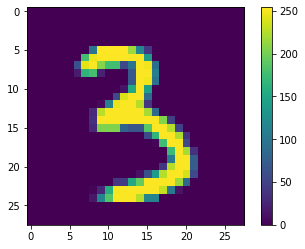

In [ ]:
# Each prediction is an array of 10 numbers (# of classes). Each number represents the confidence that the
# image corresponds to the each of the 10 different classes.

sample = 32
print(predictions[sample])
# [depends on the trained model]: we see that test_images[25] has high likelihood at class [6] = 43.82%:

# Check the model's prediction for the specified sample (manually by our eyes).
# Compare number in the image with the maximum probability index from the array.
plt.figure()
plt.imshow(test_images[sample]) # cmap=plt.cm.binary
plt.colorbar()
plt.show()

In [ ]:
# ************************************************************************************************
# **********    VISUALIZE THE PREDICTION RESULT 01    ********************************************
# ************************************************************************************************

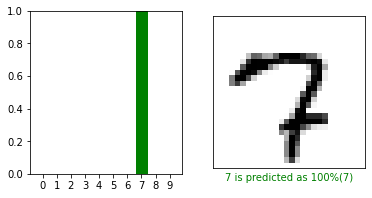

In [ ]:
sample = 36
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt_bar(predictions[sample], test_labels[sample])
plt.subplot(1,2,2)
plt_img(predictions[sample], test_labels[sample], test_images[sample])
plt.show()

In [ ]:
# ************************************************************************************************
# **********    VISUALIZE THE PREDICTIONS RESULT 02    *******************************************
# ************************************************************************************************

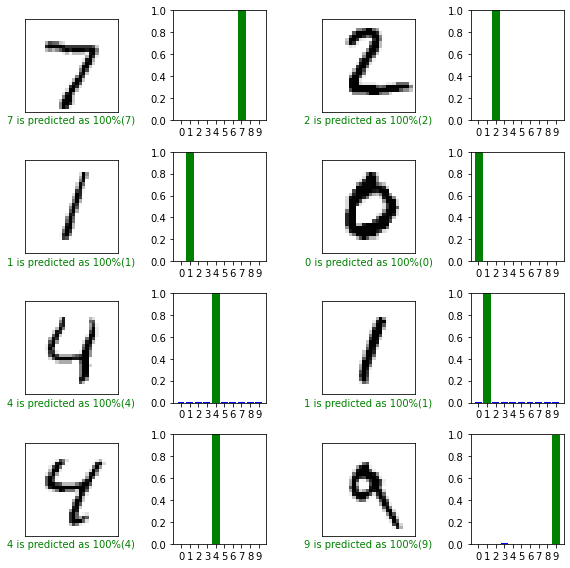

In [ ]:
rows = 4
cols = 2

num_images = rows * cols
plt.figure(figsize=(2*2*cols, 2*rows))

for i in range(num_images):
    plt.subplot(rows,2*cols, 2*i+1)
    plt_img(predictions[i], test_labels[i], test_images[i])
    plt.subplot(rows,2*cols, 2*i+2)
    plt_bar(predictions[i], test_labels[i])
    
plt.tight_layout()
plt.show()